In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mu = []
std = []

In [2]:
def load_data(filename):
    df = pd.read_csv(filename ,sep=',',index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:, 0], data[:, 2])
    data = normalize_data(data)
    features = data[:, :2]
    label = data[:, -1]
    return features, label

In [3]:
def plot_data(x, y):
    plt.xlabel('house size')     
    plt.ylabel('price')
    plt.plot(x, y, 'bo')
    plt.show() 

def normalize_data(data):
    cols = data.shape[1]
    for i in range(cols-1):
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
        mean = np.mean(data[:, i])
        std_dev = np.std(data[:, i])
        data[:, i] = (data[:, i] - mean)/(std_dev)
    return data

In [4]:
def hypothesis(X, T): # X = Feature Matrix and T = Theta(parameter) Matrix
    return np.matmul(X, T)

In [5]:
def cost_function(X, T, Y):
    H_X = hypothesis(X, T)
    m = X.shape[0]
    result = np.matmul((H_X-Y).T, (H_X-Y))
    result = (result)/(2*m)
    return result

In [6]:
def gradient_descent(X, Y, Th, learning_rate=0.1, epochs=10):
    m = X.shape[0]
    for i in range(epochs):
        H_X = hypothesis(X, Th)
        cost_ = (np.matmul((H_X-Y).T, X))*(1/m)
#         print("Before", Th)
        Th = Th - cost_.T
#         print("Inside:", cost_)
    return Th

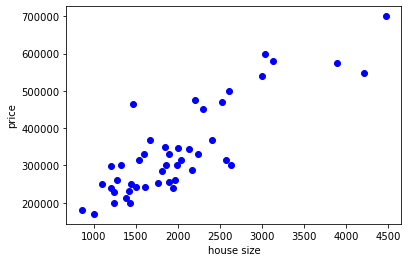

Cost:  [[2.06650278e+09]]
Parameters:  [[339119.45652174]
 [110248.92165868]
 [ -6226.22670553]]


In [7]:
X, Y = load_data('./house_price_data.txt')
Y = np.reshape(Y, (46,1))
X = np.hstack((np.ones((X.shape[0],1)), X))
theta = np.zeros((X.shape[1], 1))
learning_rate = 0.1
num_epochs = 200
theta = gradient_descent(X, Y, theta, learning_rate, num_epochs)
J = cost_function(X, theta, Y)
print("Cost: ", J)
print("Parameters: ", theta)

In [8]:
# Cost:  [[2.06669066e+09]]
# Parameters:  [[339110.44903458]
#  [109594.77707842]
#  [ -5572.08655189]]

In [9]:
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]
	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)

In [10]:
test(theta, [1600, 3]) #285427.44655119

Price of house:  [285258.00703053]
